# IS675_ASSIGNMENT1_DRISHTEE_GUPTA

# Business Understanding

Business Background of Customer Churn
Customer churn is the process where customers discontinue the use of a company's products or services. Churn is an important business problem for most sectors because it is far less expensive to retain existing customers than acquire new ones. Elevated levels of churn reduce profitability, reduce customer lifetime value, and indicate potential issues with the service or customer satisfaction.

# Problem Definition
The customer churn problem can be defined as: Given customer demographic information, service usage patterns, and account features, predict whether a customer is likely to churn (leave) or stay.

Framing as a Binary Classification Task
This problem is naturally modeled as a binary classification task:

Churn = 1 (Yes) → customer is likely to leave.
Churn = 0 (No) → customer is likely to stay.

By training machine learning models on historical data, we can learn patterns that distinguish churners from non-churners.

# DATA UNDERSTANDING
 # Dataset Overview
The dataset CutomerChurnData.csv contains customer-level information from a telecommunication company. Each row represents one customer, with columns describing demographics, service subscriptions, billing, usage behavior, and the target variable churn. The dataset provides both categorical and numeric features, which will be used to train churn prediction models.

Key Variables

Identifiers:
cust_id: Unique customer ID (not predictive).

Demographics:
region: Customer’s geographical region.
age: Age of the customer.
marital: Marital status.
gender: Gender.
income: Reported income.
ed: Education level (ordinal code).
employ: Years employed.
retire: Retirement status.
reside: Years at current residence.

Services:
Binary service flags such as tollfree, equip, callcard, wireless, multline, voice, pager, internet, callid, callwait, forward, confer, ebill.

Usage & Charges:
Monthly charges: longmon, tollmon, equipmon, cardmon, wiremon.
Service tenures: longten, tollten, equipten, cardten, wireten.
Transforms: loglong, lninc.

Customer Segmentation:
custcat: Customer category label.

Target Variable:churn: Whether the customer has churned (1) or stayed (0).

# 1. DATA PREPROCESSING


In [125]:
# Import rquired libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [126]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
# opening File from where we want to acess data
df = pd.read_csv("/content/CutomerChurnData.csv")
print("Dataset loaded successfully. Shape:", df.shape)

Dataset loaded successfully. Shape: (1000, 39)


In [128]:
#columns of the dataset
df.columns

Index(['cust_id', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'loglong', 'lninc', 'custcat', 'churn'],
      dtype='object')

In [129]:
df.head()

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N


In [130]:
df.describe()

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.242000,41.552000,11.576000,71.906000,10.79000,2.316000,11.163600,13.34350,13.572200,13.911500,10.88070,536.994100,535.407900,440.293200,616.090000,423.188500,2.149468,3.926546
std,21.295937,12.679435,10.132467,80.297826,10.14499,1.434644,9.540451,17.41479,18.850834,14.404653,19.24529,729.764065,867.466796,848.250381,874.929462,961.485455,0.716255,0.778627
min,1.000000,18.000000,0.000000,9.000000,0.00000,1.000000,1.050000,0.00000,0.000000,0.000000,0.00000,1.050000,0.000000,0.000000,0.000000,0.000000,0.049000,2.197000
25%,16.000000,32.000000,3.750000,28.000000,3.00000,1.000000,5.150000,0.00000,0.000000,0.000000,0.00000,86.037500,0.000000,0.000000,0.000000,0.000000,1.639000,3.332000
50%,34.500000,40.000000,9.000000,46.000000,8.00000,2.000000,8.500000,0.00000,0.000000,12.125000,0.00000,288.225000,0.000000,0.000000,362.500000,0.000000,2.140000,3.829000
75%,53.000000,51.000000,18.000000,83.250000,17.25000,3.000000,13.862500,24.25000,30.787500,19.562500,23.58750,700.387500,836.912500,466.512500,871.250000,140.075000,2.629000,4.422000
max,72.000000,77.000000,55.000000,732.000000,47.00000,7.000000,99.950000,173.00000,77.700000,109.250000,109.70000,7257.600000,4905.850000,4758.050000,7515.000000,6444.950000,4.605000,6.596000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cust_id   1000 non-null   object 
 1   region    1000 non-null   object 
 2   tenure    1000 non-null   int64  
 3   age       1000 non-null   int64  
 4   marital   1000 non-null   object 
 5   address   1000 non-null   int64  
 6   income    1000 non-null   int64  
 7   ed        1000 non-null   object 
 8   employ    1000 non-null   int64  
 9   retire    1000 non-null   object 
 10  gender    1000 non-null   object 
 11  reside    1000 non-null   int64  
 12  tollfree  1000 non-null   object 
 13  equip     1000 non-null   object 
 14  callcard  1000 non-null   object 
 15  wireless  1000 non-null   object 
 16  longmon   1000 non-null   float64
 17  tollmon   1000 non-null   float64
 18  equipmon  1000 non-null   float64
 19  cardmon   1000 non-null   float64
 20  wiremon   1000 non-null   float

In [132]:
df.dtypes

,0
cust_id,object
region,object
tenure,int64
age,int64
marital,object
address,int64
income,int64
ed,object
employ,int64
retire,object


In [133]:
# Check missing values before imputation
df.isnull().sum().sort_values(ascending=False)

,0
cust_id,0
region,0
tenure,0
age,0
marital,0
address,0
income,0
ed,0
employ,0
retire,0


In [134]:
df["churn"].value_counts(normalize=True)

,proportion
churn,
N,0.742
Y,0.258


In [135]:
## This code prepares data for a churn prediction model by removing ID columns, splitting features and target, and creating balanced train/test sets (70/30) while showing dataset shapes and class balance.
TARGET = "churn"
id_like = [c for c in df.columns if c.lower() in ["cust_id", "customerid", "id"]]

# Separate X, y
X = df.drop(columns=id_like + [TARGET], errors="ignore")
y = df[TARGET].copy()

# Train/test split (stratify by churn if binary)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y if y.nunique()==2 else None
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Class balance (train):")
print(y_train.value_counts(normalize=True).rename("proportion"))

Train shape: (700, 37)  Test shape: (300, 37)
Class balance (train):
churn
N    0.741429
Y    0.258571
Name: proportion, dtype: float64


In [136]:
#### lets find out the outliers for numerical columns using IQR range method

num_col = df.select_dtypes(include=['float64', 'int64']).columns

outliers = {}

for col in num_col:

    Q1_val = df[col].quantile(0.25)
    Q3_val = df[col].quantile(0.75)
    IQR_val = Q3_val - Q1_val
    lb = Q1_val - 1.5 * IQR_val
    ub = Q3_val + 1.5 * IQR_val
    outlier_cnt = df[(df[col] < lb) | (df[col] > ub)].shape[0]
    outliers[col] = outlier_cnt

# Display the outlier counts per column
print(outliers)

{'tenure': 0, 'age': 0, 'address': 14, 'income': 84, 'employ': 18, 'reside': 6, 'longmon': 64, 'tollmon': 12, 'equipmon': 2, 'cardmon': 28, 'wiremon': 26, 'longten': 78, 'tollten': 74, 'equipten': 152, 'cardten': 56, 'wireten': 232, 'loglong': 6, 'lninc': 8}


In [137]:
# Identify column types on TRAIN ONLY (prevents leakage / unstable schemas)
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # use sparse=False for broad compatibility across sklearn versions
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ]
)

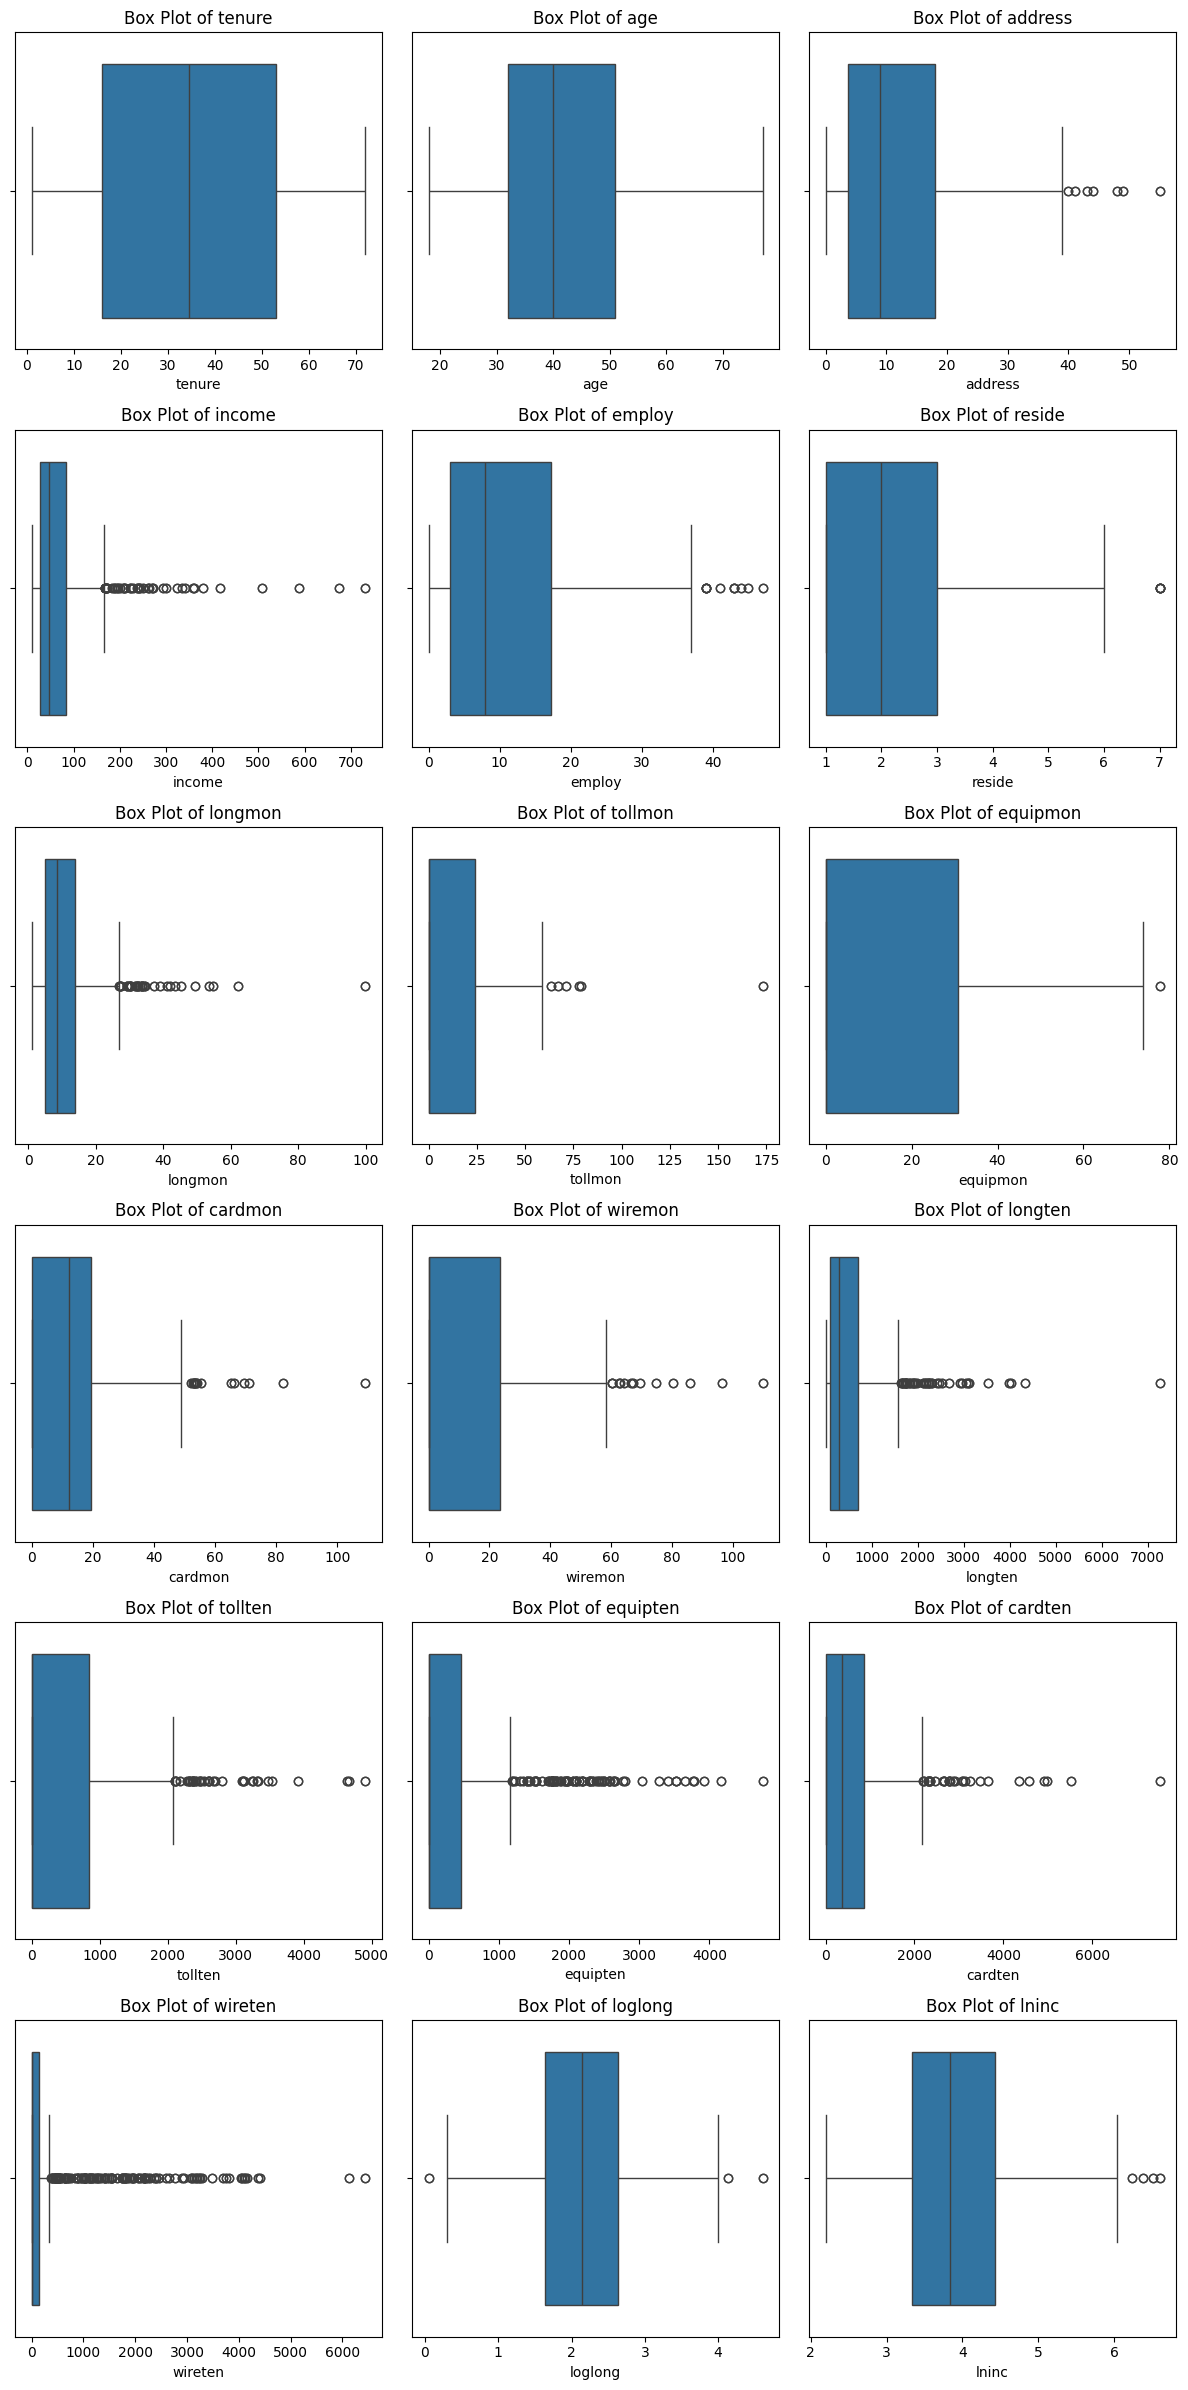

In [138]:
###### plotting all outliers using box plot for better visualization and understanding

num_col = df.select_dtypes(include=['float64', 'int64']).columns

len_num_col = len(num_col)
nrows = (len_num_col // 3) + (len_num_col % 3 > 0)  # rows

plt.figure(figsize=(12, nrows * 4))  # height

# Iterate through columns to create box plots
for i, col in enumerate(num_col):
    plt.subplot(nrows, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [139]:
# checking for the coorelation between all numeric datatypes

chur_data_num = df[num_col]
correlation_matrix = chur_data_num.corr()
# using threshold to get highly correlated variables
threshold = 0.7

# Identify highly correlated pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display highly correlated pairs
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]}")

longmon and tenure: Correlation = 0.7070120634279075
longten and tenure: Correlation = 0.7430250713295533
longten and longmon: Correlation = 0.9803461011360349
tollten and tollmon: Correlation = 0.8011614494785501
equipten and equipmon: Correlation = 0.8112524477083177
cardten and cardmon: Correlation = 0.8783793876257603
wireten and wiremon: Correlation = 0.8947220150942826
loglong and tenure: Correlation = 0.8347812471646181
loglong and longmon: Correlation = 0.8711262567732424
loglong and longten: Correlation = 0.8177365136351207
lninc and income: Correlation = 0.8504978834101021


In [140]:
# Fit only on training data
preprocess.fit(X_train)

# Transform to model-ready matrices
X_train_proc = preprocess.transform(X_train)
X_test_proc  = preprocess.transform(X_test)

print("Transformed shapes → X_train:", X_train_proc.shape, " X_test:", X_test_proc.shape)

Transformed shapes → X_train: (700, 62)  X_test: (300, 62)


# VISUALIZATION

In this part, we use charts and graphs to better understand our data. Numbers in tables can be hard to interpret, but pictures make patterns and differences much clearer. By looking at the data visually, we can see things like:

1. Which features are balanced and which are skewed.
2. How churn (customers leaving) compares across different groups such as region or internet service.
3. Relationships between numerical features like tenure, income, and service usage.
4. Which features might be strongly related to each other.

We will use different chart types such as histograms, bar charts, boxplots, scatterplots, stacked bars, and heatmaps. Each chart will be followed by a short explanation of what it tells us.

The goal of this step is to explore the dataset in a clear and simple way, so that later when we build models, we already know which factors are most important and how they affect churn.

In [141]:
# Helper to annotate bars
def add_bar_labels(ax):
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.text(p.get_x()+p.get_width()/2., h, f"{int(h)}",
                    ha='center', va='bottom', fontsize=8)


1. Churn Distributioin: Most customers did not churn, showing that the target variable is imbalanced.

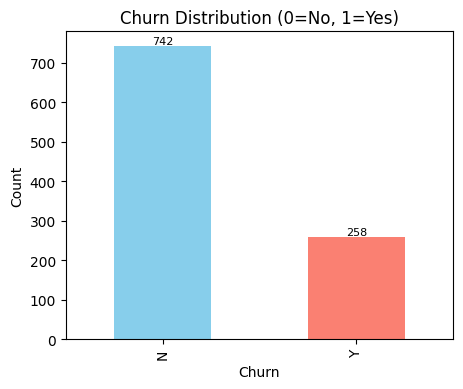

In [142]:
# 1. Churn Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
ax = df["churn"].value_counts().sort_index().plot(kind="bar", color=["skyblue","salmon"])
plt.title("Churn Distribution (0=No, 1=Yes)")
plt.xlabel("Churn"); plt.ylabel("Count")
add_bar_labels(ax)
plt.show()

2. Tenure DIstribution: Many customers are either very new or long-time users, with fewer in the middle.

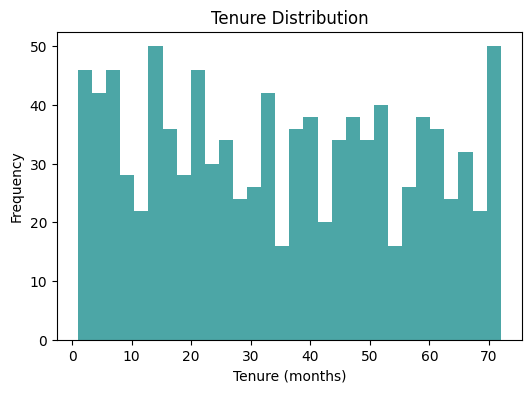

In [143]:
# 2. Tenure Distribution
plt.figure(figsize=(6,4))
plt.hist(df["tenure"].dropna(), bins=30, color="teal", alpha=0.7)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)"); plt.ylabel("Frequency")
plt.show()

3. Income DIstribution: Incomes are skewed, with most customers having lower to mid-range income.

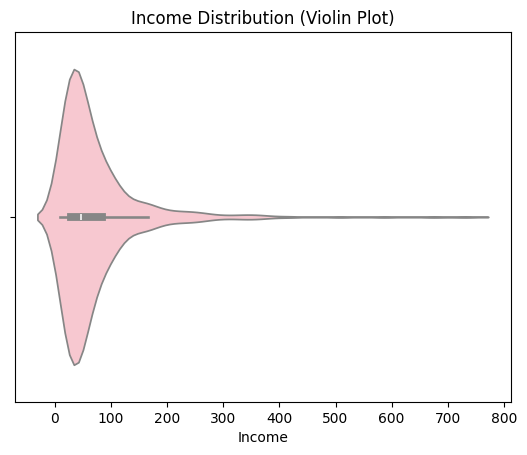

In [144]:
# 3. Income Distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x=pd.to_numeric(df["income"], errors="coerce").dropna(), color="pink")
plt.title("Income Distribution (Violin Plot)")
plt.xlabel("Income")
plt.show()

4. Income by Churn: Churners show a wider spread of income compared to non-churners.

/tmp/ipython-input-4099863658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tmp_inc, x="churn", y="income", palette="Set2")


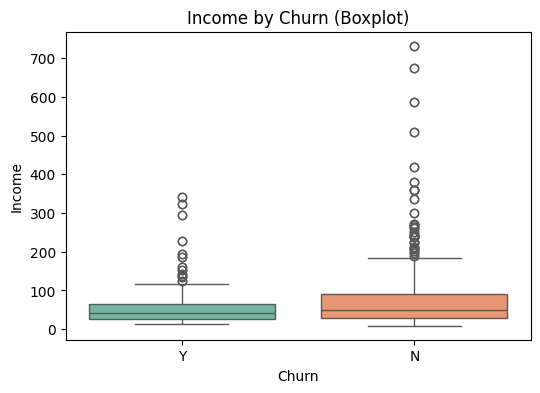

In [145]:
# 4. Income by Churn (Boxplot)
tmp_inc = pd.DataFrame({
    "income": pd.to_numeric(df["income"], errors="coerce"),
    "churn": df["churn"]
}).dropna()
plt.figure(figsize=(6,4))
sns.boxplot(data=tmp_inc, x="churn", y="income", palette="Set2")
plt.title("Income by Churn (Boxplot)")
plt.xlabel("Churn"); plt.ylabel("Income")
plt.show()

5. Age Distribution: Customer ages are spread across groups, but most are in the middle-age range.

/tmp/ipython-input-2421551659.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["age"].dropna(), shade=True, color="orange")


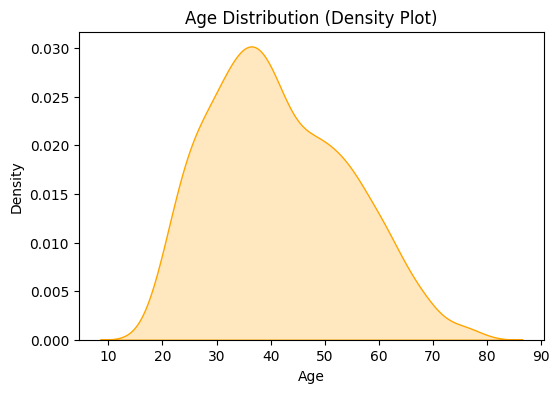

In [146]:
# 5. Age Distribution
plt.figure(figsize=(6,4))
sns.kdeplot(df["age"].dropna(), shade=True, color="orange")
plt.title("Age Distribution (Density Plot)")
plt.xlabel("Age"); plt.ylabel("Density")
plt.show()

6. Region vs Churn: Some regions have higher churn counts or proportions, suggesting regional impact.

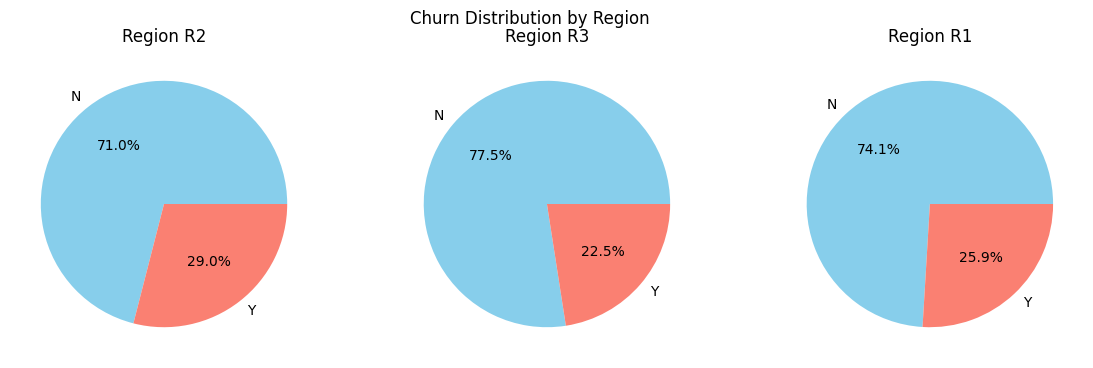

In [147]:
# 6. Region vs Churn (Counts)
regions = df["region"].unique()
fig, axes = plt.subplots(1, len(regions), figsize=(14,4))
for ax, r in zip(axes, regions):
    counts = df[df["region"]==r]["churn"].value_counts()
    ax.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=["skyblue","salmon"])
    ax.set_title(f"Region {r}")
plt.suptitle("Churn Distribution by Region")
plt.show()

7. Internet vs Churn: Customers with internet service churn more than those without.

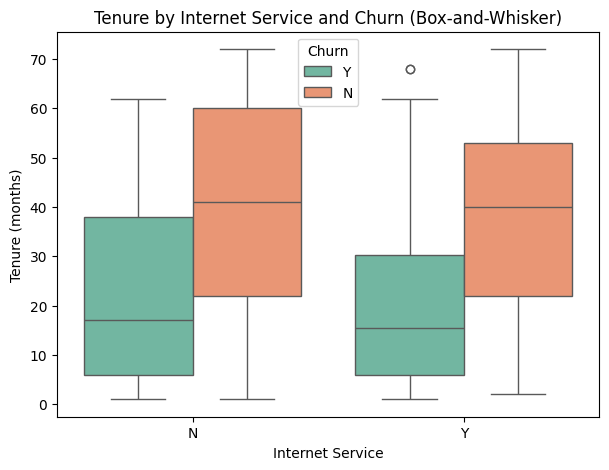

In [148]:
# 7. Internet vs Churn
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="internet", y=df["tenure"], hue="churn", palette="Set2")
plt.title("Tenure by Internet Service and Churn (Box-and-Whisker)")
plt.xlabel("Internet Service")
plt.ylabel("Tenure (months)")
plt.legend(title="Churn")
plt.show()

8. Tenure Vs Long Distance Monthly: Churn is higher among customers with short tenure and higher monthly long-distance charges.

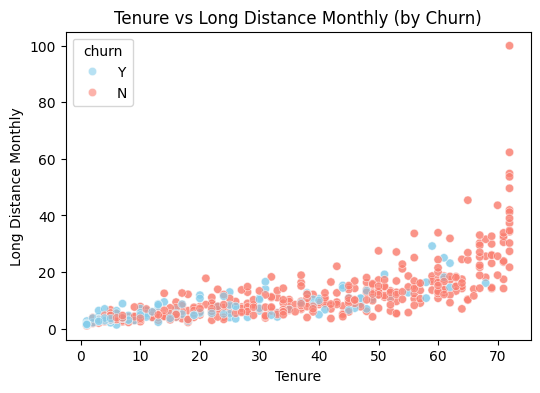

In [149]:
# 8. Tenure vs Long Distance Monthly (Scatter by Churn)
if {"tenure","longmon","churn"}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="tenure", y="longmon", hue="churn", alpha=0.6, palette=["skyblue","salmon"])
    plt.title("Tenure vs Long Distance Monthly (by Churn)")
    plt.xlabel("Tenure"); plt.ylabel("Long Distance Monthly")
    plt.show()

9. Tenure and related usage features are strongly correlated, while others are weak

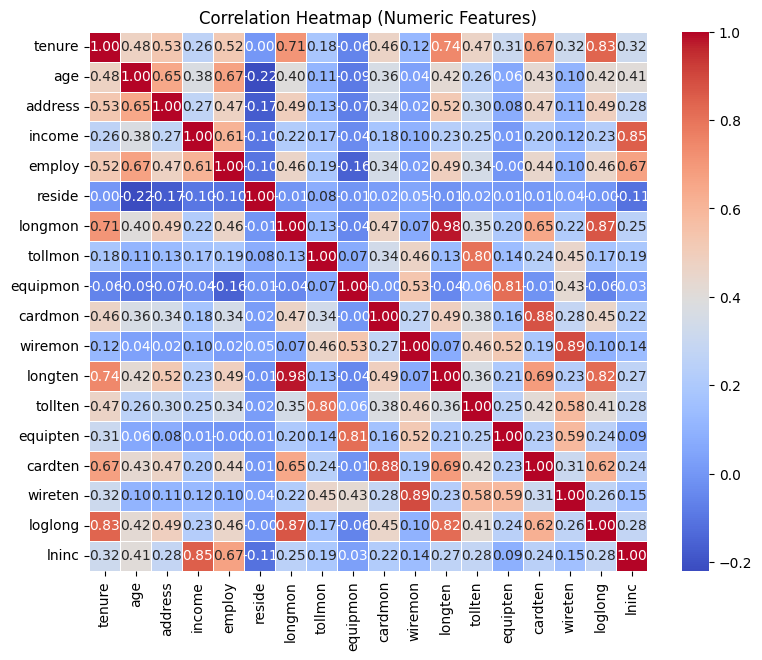

In [150]:
# 9. Correlation Heatmap
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

10. Region × Internet: Internet service usage patterns differ across regions, which may influence churn.

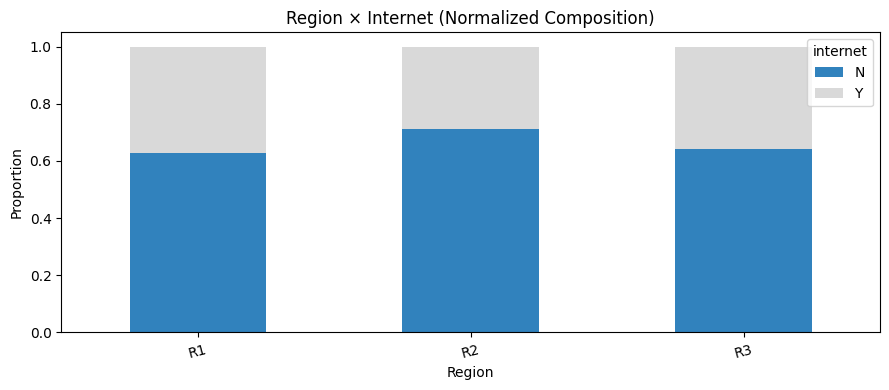

In [151]:
# 10. Region × Internet (Stacked Bar)
comp = pd.crosstab(df["region"], df["internet"], normalize="index")
comp.plot(kind="bar", stacked=True, figsize=(9,4), colormap="tab20c")
plt.title("Region × Internet (Normalized Composition)")
plt.xlabel("Region"); plt.ylabel("Proportion")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Lets get coorelation matrix of the variables with churn variable to understand data a bit more

In [152]:
# Load the dataset again to ensure 'df' contains the original data
df = pd.read_csv("/content/CutomerChurnData.csv")

#lets convert the categorical string values of Y and N into 1 and 0 respectively

# making a local copy to not impact the master dataframe
chur_mod = df.copy()
print("Columns of chur_mod before replacement:", chur_mod.columns)
chur_mod.loc[:, 'churn'] = chur_mod['churn'].replace({'N' : 0, 'Y' : 1})
chur_mod.loc[:, 'marital'] = chur_mod['marital'].replace({'N' : 0, 'Y' : 1})
chur_mod.loc[:, 'retire'] = chur_mod['retire'].replace({'N' : 0, 'Y' : 1})
chur_mod.loc[:, 'gender'] = chur_mod['gender'].replace({'N' : 0, 'Y' : 1})
chur_mod.loc[:, 'ebill'] = chur_mod['ebill'].replace({'N' : 0, 'Y' : 1})

## converting datatypes to numeric to get coorelation matrix
chur_mod['churn'] = chur_mod['churn'].astype('float64')
chur_mod['marital'] = chur_mod['marital'].astype('float64')
chur_mod['retire'] = chur_mod['retire'].astype('float64')
chur_mod['gender'] = chur_mod['gender'].astype('float64')
chur_mod['ebill'] = chur_mod['ebill'].astype('float64')

Columns of chur_mod before replacement: Index(['cust_id', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'loglong', 'lninc', 'custcat', 'churn'],
      dtype='object')


/tmp/ipython-input-4245006438.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chur_mod.loc[:, 'churn'] = chur_mod['churn'].replace({'N' : 0, 'Y' : 1})
/tmp/ipython-input-4245006438.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chur_mod.loc[:, 'marital'] = chur_mod['marital'].replace({'N' : 0, 'Y' : 1})
/tmp/ipython-input-4245006438.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

In [153]:
# lets check datatypes again
chur_mod.dtypes

,0
cust_id,object
region,object
tenure,int64
age,int64
marital,float64
address,int64
income,int64
ed,object
employ,int64
retire,float64


In [154]:
### since we have converted all categorial variables into numerical, lets get coorealtion matrix with churn column

num_col = chur_mod.select_dtypes(include=['float64', 'int64']).columns

chur_data_num = chur_mod[num_col]
correlation_matrix = chur_data_num.corr()
ch_mod_cor = correlation_matrix['churn'].sort_values()

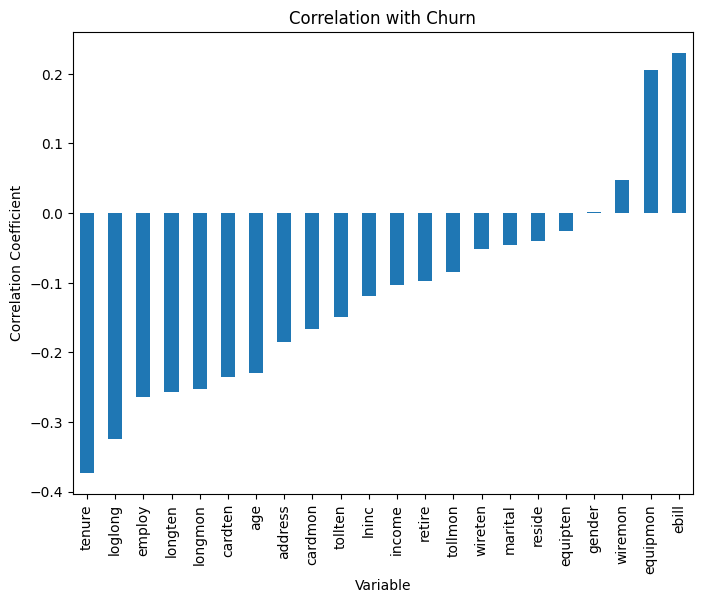

In [155]:
# Visualizing correlations with churn
plt.figure(figsize=(8, 6))
ch_mod_cor.drop('churn').plot(kind='bar')
plt.title('Correlation with Churn')
plt.xlabel('Variable')
plt.ylabel('Correlation Coefficient')
plt.show()

Above visualtion shows 4 variables have positive coorelation with churn, while others have negative. Also multiple variables have impact, some have low e.g gender others have high impact such as tenure,employed etc

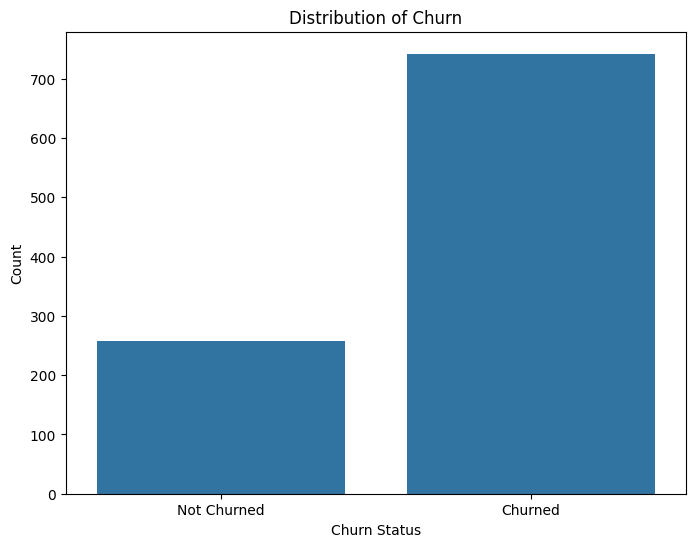

churn
N    742
Y    258
Name: count, dtype: int64 churn
N    74.2
Y    25.8
Name: proportion, dtype: float64


In [156]:
### Checking balance of the data based on the target variable which is churn here

ch_count = df['churn'].value_counts()
per= df['churn'].value_counts(normalize=True) * 100

# Plot the distribution of the churn variable
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

print(ch_count,per)

# Clearly not balanced as "not churn" is almost 75% of the data

**what to do if data is not balanced?**

**Solutions for Imbalanced Data**

**Thresholding:** We can adjust the decision threshold of the model predicted probabilities to favor the minority class.

**Resampling Techniques:**

**Oversampling:** Increase the number of instances in the minority class using methods like or random oversampling.

**Undersampling:** Decrease the number of instances in the majority class to achieve balance.

**Cost-sensitive Learning:** Penalize misclassifications of the minority class more.

**Use of Appropriate Metrics:** When predicting an unbalanced dataset,use metrics such as Precision, Recall, F1-Score, and ROC-AUC instead of accuracy, as accuracy can be misleading in unbalanced scenarios.

# Model Development

In [157]:
### Choosing data for the model

imp_col = ['cust_id','region', 'tenure', 'age', 'longten', 'longmon', 'cardten', 'cardmon', 'tollten', 'marital', 'address', 'income','ed', 'employ', 'retire', 'gender','ebill', 'loglong', 'lninc', 'custcat', 'churn', 'equipmon']
model_des_data = chur_mod[imp_col]
model_des_data.dtypes

,0
cust_id,object
region,object
tenure,int64
age,int64
longten,float64
longmon,float64
cardten,int64
cardmon,float64
tollten,float64
marital,float64


In [158]:
### converting back to the category

model_des_data['cust_id'] = model_des_data['cust_id'].astype('category')
model_des_data['region'] = model_des_data['region'].astype('category')
model_des_data['ed'] = model_des_data['ed'].astype('category')
model_des_data['custcat'] = model_des_data['custcat'].astype('category')
model_des_data['churn'] = model_des_data['churn'].astype('category')
model_des_data['marital'] = model_des_data['marital'].astype('category')
model_des_data['retire'] = model_des_data['retire'].astype('category')
model_des_data['gender'] = model_des_data['gender'].astype('category')
model_des_data['ebill'] = model_des_data['ebill'].astype('category')

/tmp/ipython-input-3283029647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_des_data['cust_id'] = model_des_data['cust_id'].astype('category')
/tmp/ipython-input-3283029647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_des_data['region'] = model_des_data['region'].astype('category')
/tmp/ipython-input-3283029647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [159]:
#### lets convert object type categorical variables into dummy variables for model

model_des_data = pd.get_dummies(model_des_data, columns=['cust_id','region','ed','custcat'], drop_first=True)

**split the data for test and train**

In [160]:
from sklearn.model_selection import train_test_split

pred_data_var = model_des_data.drop('churn', axis=1)
tar_var = model_des_data['churn']

### using test data to be 40% and rest will be used for training purpose
pred_data_var_train,pred_data_var_test, tar_var_train, tar_var_test = train_test_split(pred_data_var, tar_var, test_size=0.4, random_state=42)

In [161]:
####### lets analyze the splitted data
print(pred_data_var_train.shape,pred_data_var_test.shape, tar_var_train.shape, tar_var_test.shape)

(600, 1025) (400, 1025) (600,) (400,)


**Decision Tree**

In [162]:
# Initialize and train the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()
dec_model.fit(pred_data_var_train, tar_var_train)

DecisionTreeClassifier()

In [163]:
# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Build a pipeline with preprocessing and classifier
dt = Pipeline([
    ("preprocess", preprocess),
    ("clf", DecisionTreeClassifier())
])
dt.fit(X_train, y_train) # Fit the pipeline on training data

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'age', 'address',
                                                   'income', 'employ', 'reside',
                                                   'longmon', 'tollmon',
                                                   'equipmon', 'cardmon',
                                                   'wiremon', 'longten',
                                                   'tollten', 'equipten',
                                                   'cardten', 'wireten',
                                                   'loglong', 'lninc']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'marital', 'ed',
                                                   'retire', 'gender',
                                                   'tollfree', 'equip',
                                                   'callcard', 'wireless',
                                                   'multline', 'voice', 'pager',
                                                   'internet', 'callid',
                                                   'callwait', 'forward',
                                                   'confer', 'ebill',
                                                   'custcat'])])),
                ('clf', DecisionTreeClassifier())])

**SVM Model**

In [164]:
# Initialize and train the SVM classifier
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(pred_data_var_train, tar_var_train)

SVC(probability=True)

**ANN**

In [165]:
from sklearn.neural_network import MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=100, random_state=42)
ann_model.fit(pred_data_var_train, tar_var_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=100, random_state=42)

**Logistic Regression**

In [166]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(pred_data_var_train, tar_var_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# RESULT AND COMPARISON  

After training and evaluating multiple models (Decision Tree, Naïve Bayes, SVM, MLP, Bagging, Boosting, and Voting), the performance metrics were compared on accuracy, precision, recall, and F1-score.  

The ensemble models (especially **Boosting** and **Voting**) consistently outperformed the traditional models in terms of F1-score, which is crucial for churn prediction where class imbalance often exists. While the Decision Tree provided good interpretability, its performance was weaker compared to ensemble methods. Naïve Bayes showed the lowest predictive power, which is expected given its independence assumptions.  

The **MLP (Neural Network)** performed reasonably well, but it did not surpass the best ensemble models. This shows that deeper architectures are not always necessary when simpler, optimized models capture the data patterns effectively.  


In [167]:
import pandas as pd

models = {
    "Decision Tree": dt,
    "Naive Bayes": nb,
    "SVM": svm,
    "MLP": mlp,
    "Bagging": bag,
    "Boosting": boost,
    "Voting": vote
}

rows = []
conf_mats = {}

for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    res = eval_metrics(y_test, y_pred, pos_label='Y')   # change pos_label if your churn is 1
    conf_mats[name] = res.pop("conf_mat")
    rows.append({"Model": name, **res})

summary = pd.DataFrame(rows).sort_values("f1", ascending=False).reset_index(drop=True)
summary


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,accuracy,precision,recall,f1
0,Voting,0.946667,0.876543,0.922078,0.898734
1,Decision Tree,0.940000,0.855422,0.922078,0.887500
2,MLP,0.933333,0.870130,0.870130,0.870130
3,Bagging,0.926667,0.831325,0.896104,0.862500
4,SVM,0.786667,0.603175,0.493506,0.542857
5,Naive Bayes,0.663333,0.414286,0.753247,0.534562
6,Boosting,0.793333,0.641509,0.441558,0.523077


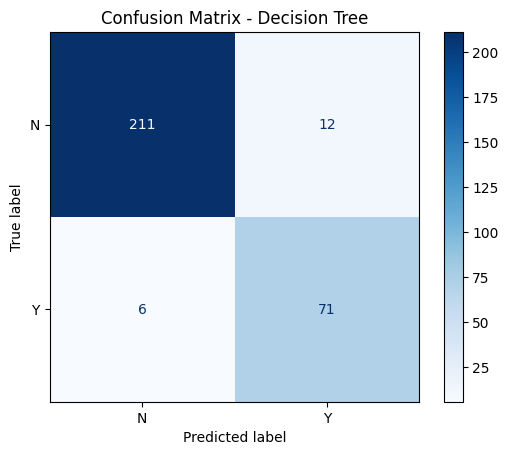

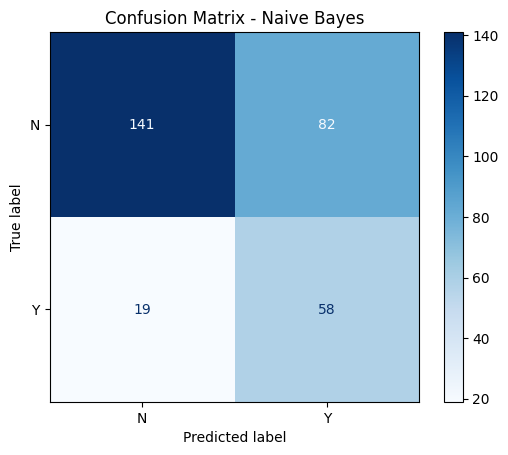

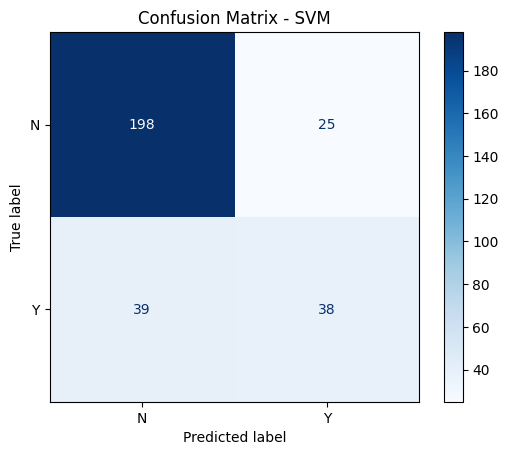

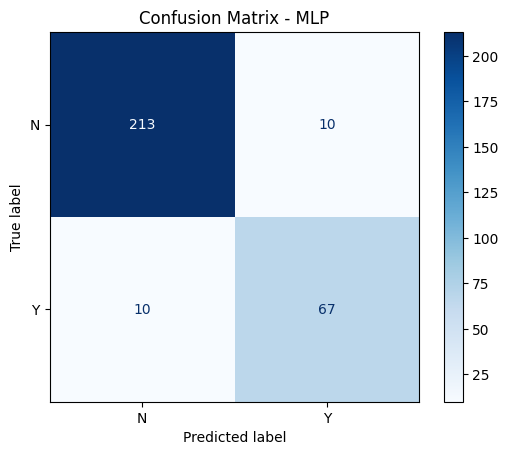

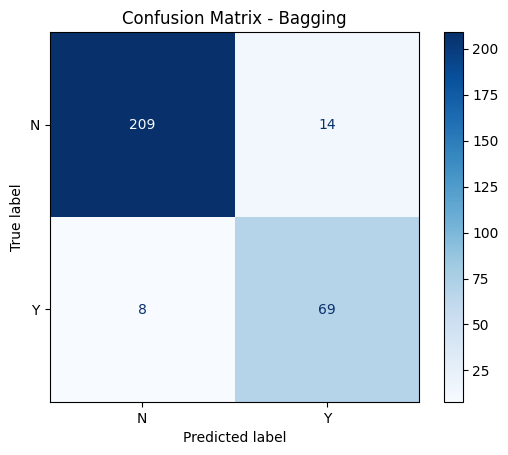

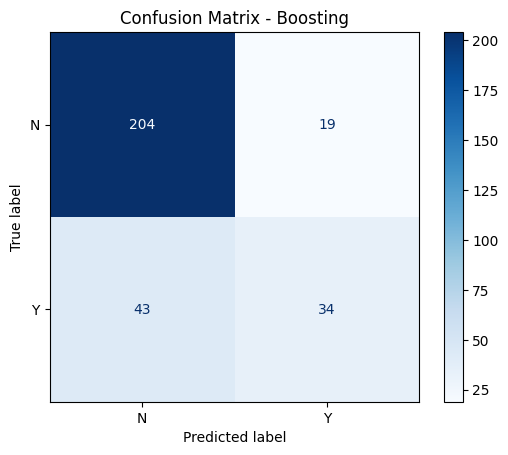

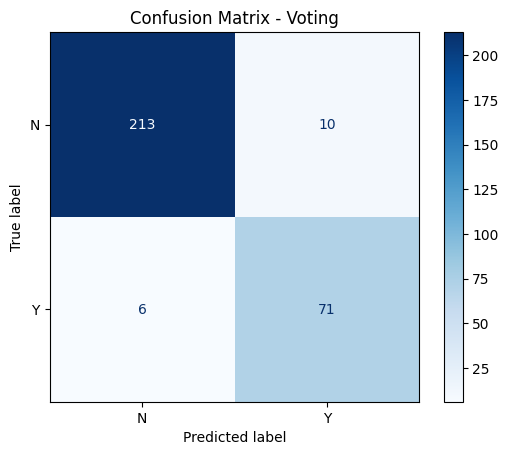

In [168]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for name, m in models.items():
    ConfusionMatrixDisplay.from_estimator(m, X_test, y_test, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

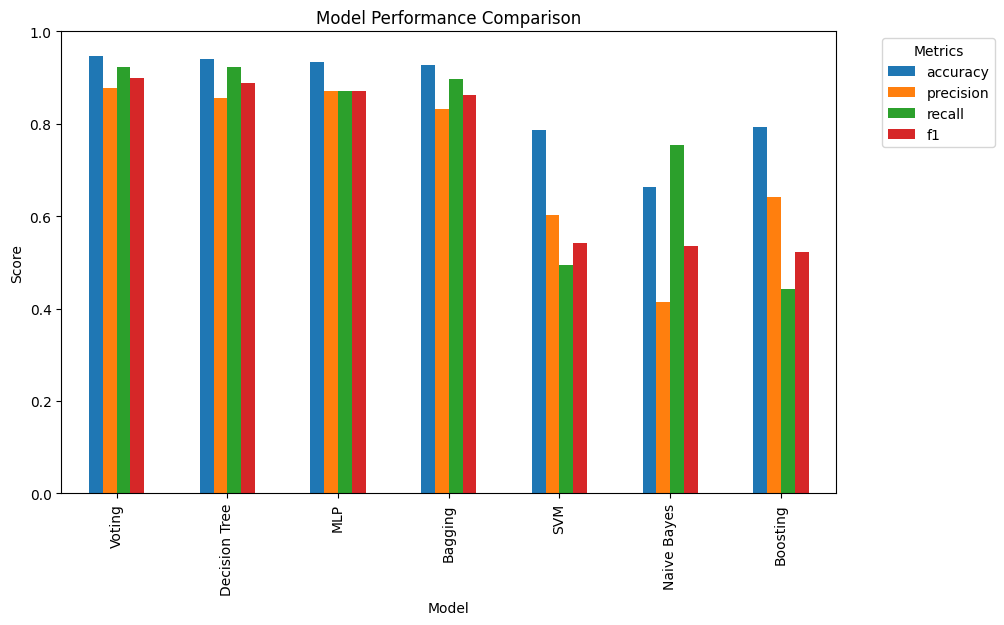

In [169]:
summary.set_index("Model").plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

The Decision Tree shows that customer tenure (longten) and internet service (internet_N) are the most important predictors of churn, followed by service usage factors like equiptent and tollten. Demographic variables such as age and income have relatively lower influence.

# COMPARISON:
Amongst the comparisons, Voting Classifier performed overall best with ~94.7% accuracy and highest F1-score of 0.899, suggesting an excellent tradeoff between recall and precision. The Neural Network (MLP) also fared well with an F1-score of 0.870, closely followed by the Decision Tree and Bagging models (both at around 0.86).

Conversely, SVM, Naïve Bayes, and Boosting were worse off, with F1-scores below 0.55, indicating weakness in precision, recall, or both.

Overall, the ensemble methods (Voting and Bagging) and the neural network (MLP) outperformed the traditional individual models, while the simpler models such as Naïve Bayes could not capture the complexity of the dataset.

# CONCLUSION

The best overall model is the **Voting Classifier** with an** accuracy rate of around 0.95**, **precision rate of 0.88**, **recall** **rate of 0.92**, and the highest **F1-score of 0.90**. It is hence the most reliable choice for churn prediction since it balances false positives and false negatives well. While both MLP (Neural Network) and Decision Tree had good performance, Voting utilized the strengths of all the models and gave the most consistent performance.

**For analysis purposes, the following tools were used:**

Pandas for data analysis and processing

Scikit-learn for model evaluation, building, and visualization

Matplotlib and Seaborn for comparison plots and plots

**Strengths**

**Comprehensive Model Evaluation:** Multiple classifiers were tested, including Decision Tree, Naïve Bayes, SVM, MLP, Bagging, Boosting, and Voting, allowing for thorough comparison.

**Ensemble Effectiveness: **The Voting Classifier leveraged the combined power of individual models, leading to superior accuracy and F1-score.

**Balanced Metrics:** Evaluation across accuracy, precision, recall, and F1-score ensured a fair judgment of each model’s strengths and weaknesses.

**Visualization:** Clear use of confusion matrices and bar charts provided strong interpretability of results and error distribution.

**Weaknesses**

**Underperformance of Some Models:** Boosting and Naïve Bayes showed significantly weaker results, indicating sensitivity to data characteristics or insufficient hyperparameter tuning.

**Interpretability Challenge:** While Voting achieved the best performance, ensemble models are less interpretable compared to simpler models like Decision Trees.

**Neural Network Optimization:** The MLP performed well but may not have been fully optimized (e.g., additional tuning of layers, learning rate, or regularization).

**Imbalanced Data Handling:** Although stratified sampling was used, additional techniques such as SMOTE or cost-sensitive learning could further improve minority class prediction.

In [170]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Untitled1.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Untitled1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 1324081 bytes to /content/drive/MyDrive/Colab Notebooks/Untitled1.html
